## Bike Sharing Use Case

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Factors that need to be addressed:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

#### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#### Understanding the data

    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : wether the day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Before going deep into the analysis and modelling, lets note down the steps that we will be following:

    1. Import libraries, Load and inspect the data.
    2. Data Quality/Sanity check.
    3. Feature Analysis and Cleaning
        3a. Analysis of Categorical variables
        3b. Analysis of Numerical variables
    4. Encoding: Creation of Dummy Variables
    5. Splitting the data into train and test
    6. Data Transformation: Scaling
    7. Creating the linear model
    8. Validating the assumptions of linear regression algorithm
    9. Predicting the test data using the final model
    10. Final Summary and Insights.

### 1a. Importing the required Libraries

In [2]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from scipy.stats import pearsonr
import datetime
import calendar

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### 1b. Data Loading & Inspection

In [3]:
# Loading the csv file. As describd in data dictionary, instant being an record index I am using it as the dataframe index.
df = pd.read_csv('day.csv', index_col = 'instant')

In [4]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 88.4+ KB


In [7]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Summary of Phase-1

- There are 730 rows and 16 columns including instant which I made the index of the dataset.
- Except for dteday the datatype of all other features are either int or float
- In upcoming steps we will checking the presence of null values, seperate categorical and numerical values, impute the missing values and many more. 

### 2. Data Quality Check

In [8]:
# Checking the percentage of missing values in the dataset

((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
dtype: float64

Since there are no missing/NULL values in the datasetwe dont need any kind of imputation. Now we can jump to in-depth feature analysis and cleaning.

### 3. Feature analysis and cleaning

Here we need to check the data each feature contains inorder to check if there is presence of unwanted/misleading data. I am checking one feature at a time. 

In [9]:
# Lets first convert the datatype of dteday to datetime

df['dteday'] = pd.to_datetime(df['dteday'])

In [10]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Seperating numerical and categorical features
num_ = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
cat_ = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
# Creating a new dummy dataframe num_df which will have numerical features for analysis.
num_df = df[num_]

In [13]:
# Creating another dummy dataframe cat_df which contains only categorical feature. This dataframe has been created for the pupose of
# checking the value_counts.
cat_df = df[cat_]

##### 3a. Analysis of categorical features

In [14]:
# Checking the values in the categorical features

for i in cat_df:
    print(cat_df[i].value_counts(), '\n')

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64 

1    504
0    226
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 



 The categorical features contain the correct classes/category as mentioned in the data dictionary. 

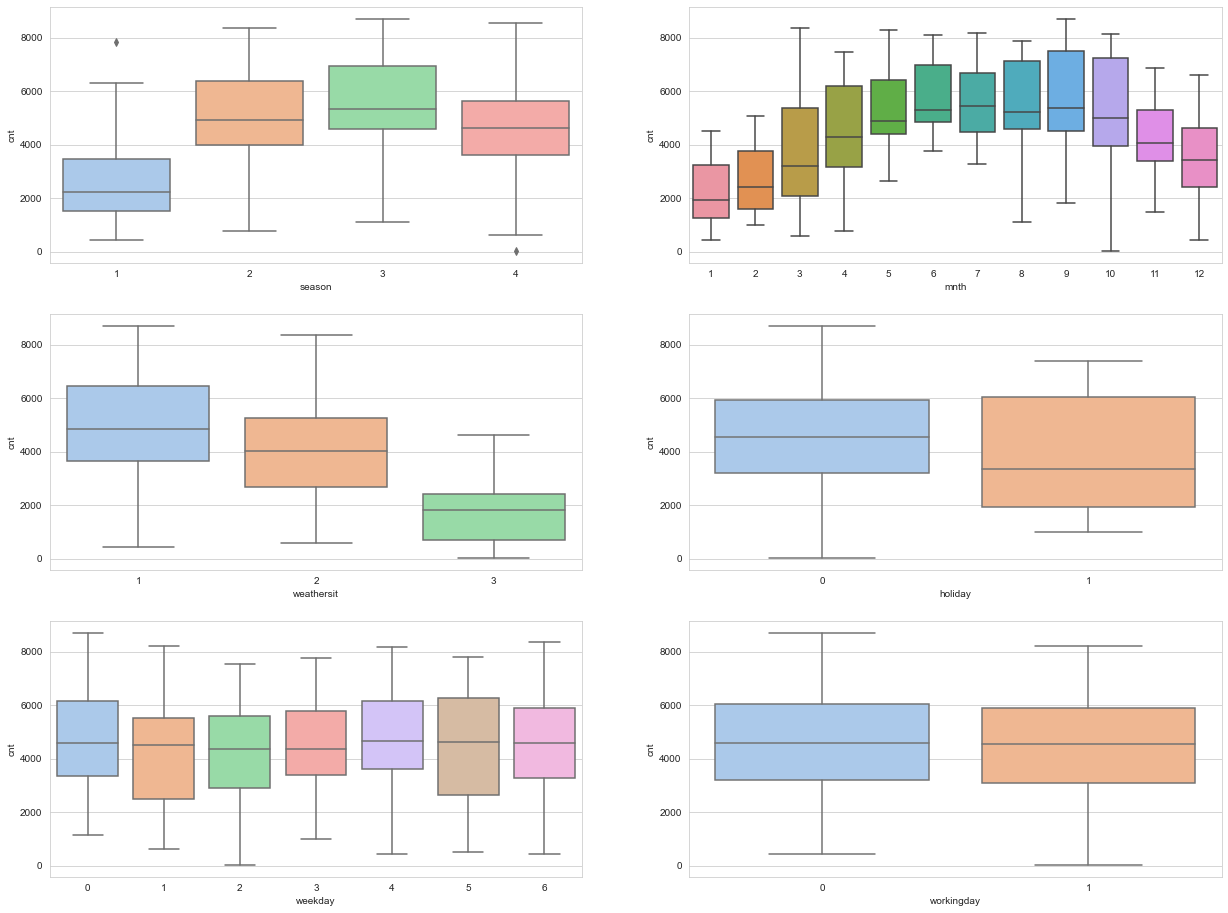

In [15]:
# Lets plot boxplots for all the categorical features against the target variable to check the distribution of data.

plt.figure(figsize=[21,16])
sns.set_palette("pastel")
sns.set_style('whitegrid')

plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

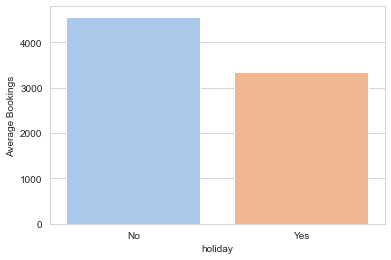

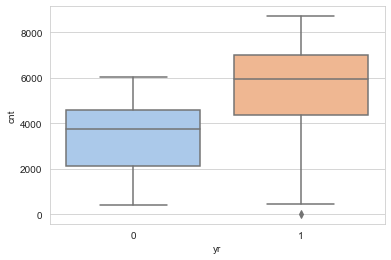

In [16]:
# Plotting bar graph for holiday and workingday

holiday_df = df.groupby(['holiday'])['cnt'].median().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df)
plt.xticks(np.arange(2),('No','Yes'))
plt.ylabel("Average Bookings")
plt.show()

# plotting a boxplot for year-wise bookings
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()



##### Result of Categorical data analysis:

-  Season 3 saw the highest booking with more than 5000 median bookings followed by season 2 and season 4.
-  Month 4,5,6,7,8,9,10,11 have median over 4000 bookings per month.
-  Weathersit 1 has the highest bookings while weathersit 3 has the lowest.There were no bookings in weathersit 4. This feature will have a significant role in modelling.
-  Obviously, there were more bookings on a non-holiday i.e. working day as compared to holiday and this feature will also play a major role in model building.
-  Booking during week days are following a similar trend and have median between 4000 and 5000.
-  There was a significant increase in bookings in 2019.

##### 3b. Analysis of numerical features

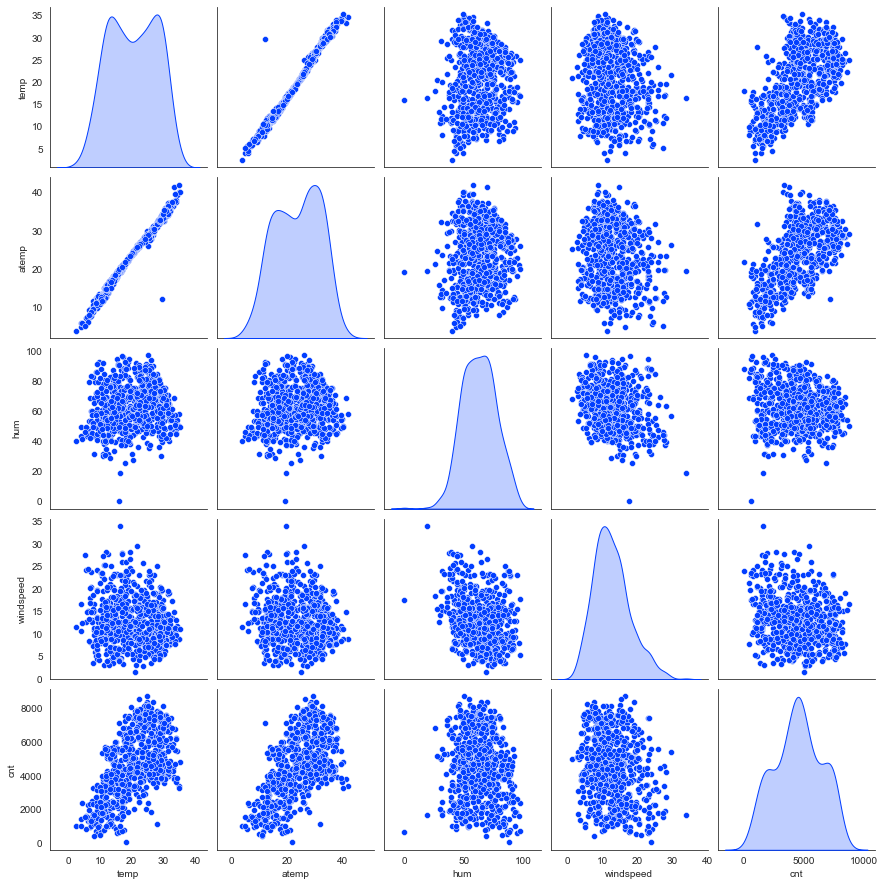

In [17]:
#sns.pairplot(data=df,vars= num_)
sns.set_style('white')
sns.set_palette("bright")


sns.pairplot(data=df,vars= ['temp', 'atemp', 'hum','windspeed', 'cnt'], diag_kind='kde')
plt.show()

Here we can observe that there is a linear relation with an upward trend in temp, atemp and cnt feature.

### 4. Encoding (Creating dummy variables)

Before going ahead with encoding, I am going to rename some columns and their data for better understanding and interpretation.

In [18]:
# Refactoring the column 'season'
df['season'] = df['season'].astype(str)
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

In [19]:
# Refactoring the column 'weathersit'
df['weathersit'] = df['weathersit'].astype(str)
df['weathersit'].replace(['1','2','3','4'],['Good', 'Fine', 'Bad', 'Very Bad'], inplace=True)

In [20]:
#Refactoring the column weekday with names of days
df['weekday'] = df['weekday'].astype(int)
df['weekday'] = df['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [21]:
# Refactoring the column month with names of months
df['mnth'] = df['mnth'].astype(int)
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [22]:
# Checking the data if changes have been made.
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,spring,0,Jan,0,monday,1,Fine,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,spring,0,Jan,0,tuesday,1,Fine,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,spring,0,Jan,0,wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,spring,0,Jan,0,thursday,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,spring,0,Jan,0,friday,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


There are three columns in the dataset that I believe are not required for modelling: 
 - dteday: Since we have month and year column.
 - casual and registered: The cnt coulmn is a derived column from these two columns.
 
Proceeding ahead with deleting these three columns as there is no need make model complex with these insignificant columns.

In [23]:
df = df.drop(columns = ['dteday', 'casual', 'registered'])

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,0,Jan,0,monday,1,Fine,14.110847,18.18125,80.5833,10.749882,985
2,spring,0,Jan,0,tuesday,1,Fine,14.902598,17.68695,69.6087,16.652113,801
3,spring,0,Jan,0,wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
4,spring,0,Jan,0,thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
5,spring,0,Jan,0,friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


Now our data is good enough to perform encoding or creating dummy variables.I will be **creating dummy variables** of the following columns: 

    - season
    - mnth
    - weekday
    - weathersit

In [25]:
# Creating a new dataframe with all the dummies. I am dropping the first column of each value inorder to decrease the number 
# of features.
df_with_dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)

In [26]:
df_with_dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Fine,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
# Concatinating this new dataframe withour original dataframe
df = pd.concat([df, df_with_dummy], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Fine,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,spring,0,Jan,0,monday,1,Fine,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,spring,0,Jan,0,tuesday,1,Fine,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,spring,0,Jan,0,wednesday,1,Good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,spring,0,Jan,0,thursday,1,Good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,spring,0,Jan,0,friday,1,Good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
# now that we have dummies we can remove the original columns from the dataframe.
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_Fine,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
# Putting 'cnt' inthe end as its the target and it will be easier to interpret.

count = df.pop('cnt')
df['cnt'] = count

### 5. Splitting the data

We will split the data before scaling. Here I am considering 70 percent for training and 30 percent for validation/testing. 

In [30]:
train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# Lets checkthe size of train and test data
print('Train ====>', train.shape)
print('Test ====>',test.shape)

Train ====> (510, 30)
Test ====> (219, 30)


### 6. Data Transformation [Feature Scaling]

  - For feature scaling, I will be using MinMaxScaler.
  - The columns that need scaling are: [temp, atemp, hum, windspeed, cnt]

In [32]:
mm_scaler = MinMaxScaler()

# columns that need scaling
features_sc = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [33]:
# Scaling the train data
train[features_sc] = mm_scaler.fit_transform(train[features_sc])

In [34]:
# Scaling the test data
test[features_sc] = mm_scaler.transform(test[features_sc])

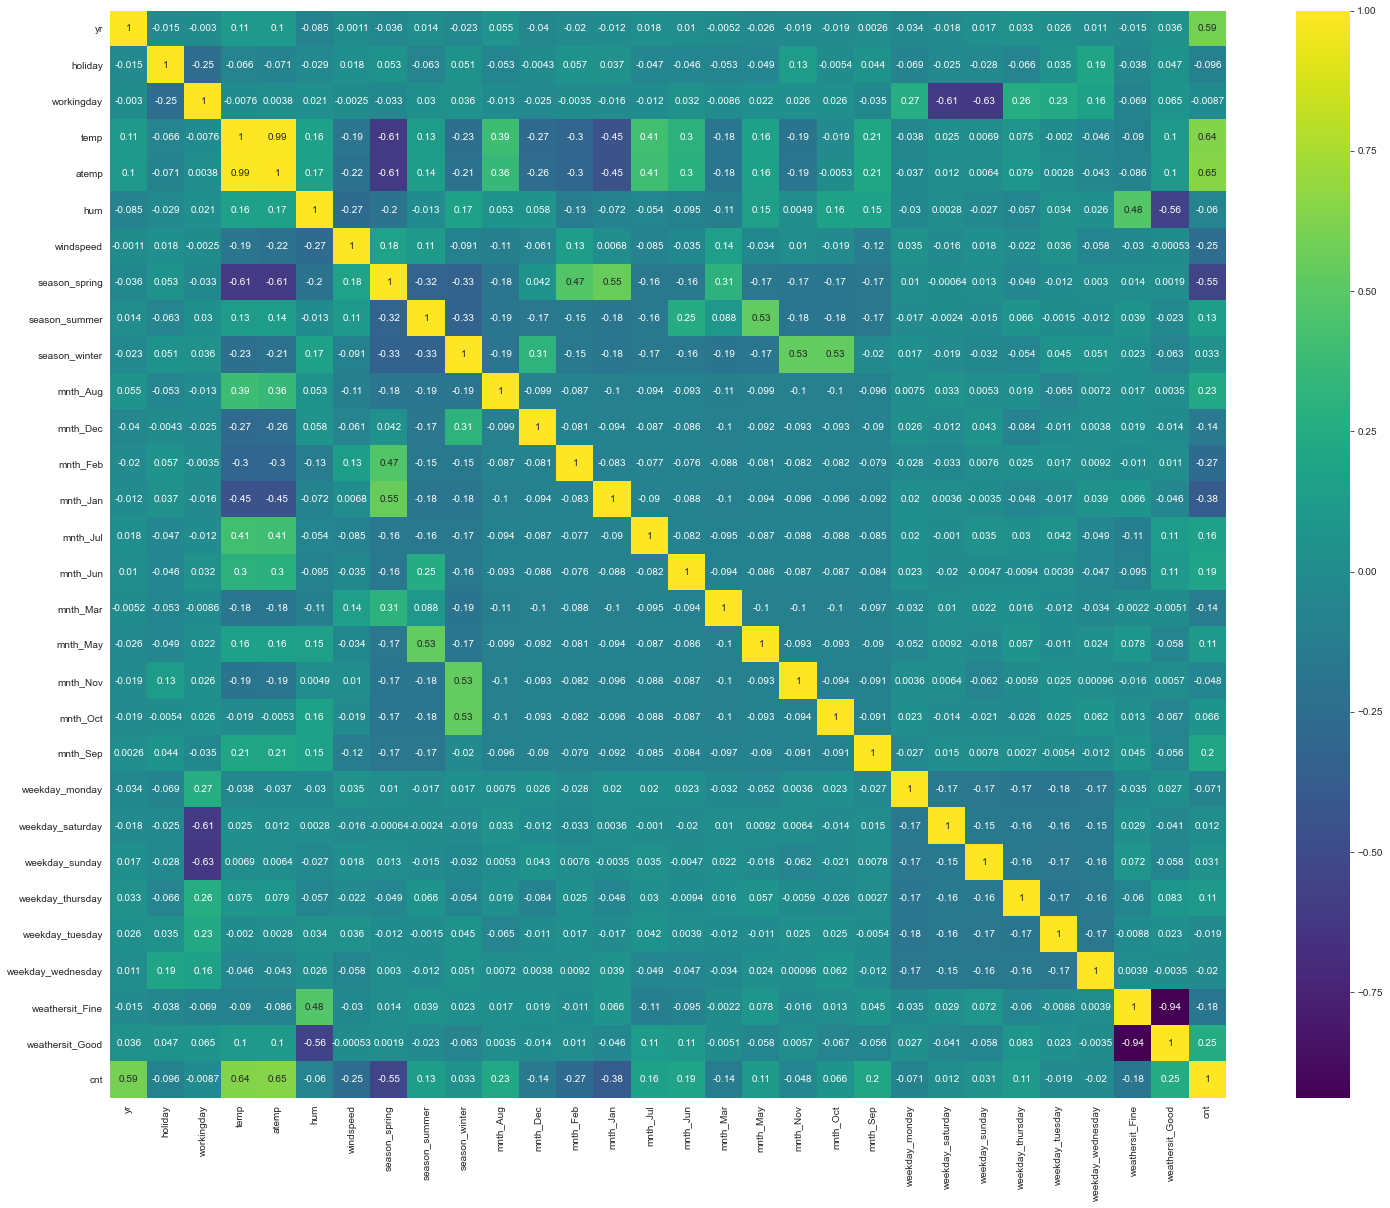

In [35]:
# Before jumping to next steps lets plot the correlation heatmap for the prepared train data
plt.figure(figsize = (25,20))
sns.heatmap(train.corr(), annot = True, cmap="viridis")
plt.show()

We can see that there are some features with strong positive and negative correlations with the target variable. This analysiswill be helpful in our upcoming steps of model creation.

### 7. Model Development

This is an iterative process,so there are a few points that we need to keep in mind:

    - There are 29 features, hence trying out different combinations will be tedious.
    - We will be using Sklearn RFE, statsmodels VIF and changes in adjusted R squared in conjunction to filter out the significant features.
    - First we will use OLS Regression with statsmodels.
    - When we are sure of which features to use then we will build the final model with Sklearn.
    - We will perform checks for Linear regression model assumption post model creation.
    - Predict the booking count for the test data.
    - For model assessment we will be using R Squareed metric [s2_score] 
    
Now before starting the development of model, lets devise a criteria to select a feature based on VIF and p-value:
    
    - Remove feature if high p-value
    - Features should have p-value<=0.05 [it signifies that features are statistically significant]
    - Features should have VIF <=5 [it signifies absense of multicollinearity]
    - ALWAYS REMOVE ONE FEATURE AT A TIME.
    

In [36]:
# Seperating the target variable and independent variables

train_y = train.pop('cnt')
train_x = train

In [37]:
# We will be needing VIF of features at several instances, creating a function for it

def get_vif(df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = df.columns
    vif_df['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

In [38]:
# Getting RFE for top 15 features

lr_rfe = LinearRegression()
lr_rfe.fit(train_x, train_y)

rfe = RFE(lr_rfe, 15)
rfe = rfe.fit(train_x, train_y)

In [39]:
rfe_df = pd.DataFrame({'Predictors': train_x.columns, 'Select': rfe.support_, 'Rank': rfe.ranking_})
rfe_df.sort_values(by='Rank')

,Predictors,Select,Rank
0,yr,True,1
20,mnth_Sep,True,1
18,mnth_Nov,True,1
27,weathersit_Fine,True,1
13,mnth_Jan,True,1
11,mnth_Dec,True,1
9,season_winter,True,1
8,season_summer,True,1
14,mnth_Jul,True,1
6,windspeed,True,1


In [40]:
train_x.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Fine', 'weathersit_Good'],
      dtype='object')

In [41]:
# Lets build our first model with all the variables ranked by RFE

col = train_x.columns[rfe.support_]
train_x_rfe = train_x[col]

train_x_sm = sm.add_constant(train_x_rfe)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.34e-189
Time:                        21:30:04   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0721      0.047      1.519      0.129      -0.021       0.165
yr                  0.2303      0.008     28.511      0.000       0.214       0.246
holiday            -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                0.4800      0.037     12.977      0.000       0.407       0.553
hum                -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed          -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring      -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer       0.0408      0.015      2.659      0.008       0.011       0.071
season_winter       0.1034      0.018      5.763      0.000       0.068       0.139
mnth_Dec           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_Jan           -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_Jul           -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_Nov           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_Sep            0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Fine     0.1922      0.025      7.697      0.000       0.143       0.241
weathersit_Good     0.2481      0.026      9.402      0.000       0.196       0.300
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
get_vif(train_x)

,Features,VIF
0,temp,442.76
1,atemp,382.24
2,workingday,82.92
3,hum,38.87
4,weathersit_Good,25.37
5,weekday_sunday,16.31
6,weekday_saturday,15.40
7,season_spring,13.75
8,weathersit_Fine,12.81
9,season_winter,12.57


We can see that p-value of all he features are somehow in our assumption range. Lets filter based on the VIF. Dropping **temp** as it has the highest VIF. 

In [43]:
# Building the II model

col1 = col.drop(['temp'])
train_x_rfe_2 = train_x[col1]

train_x_sm = sm.add_constant(train_x_rfe_2)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     135.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.45e-159
Time:                        21:30:04   Log-Likelihood:                 439.92
No. Observations:                 510   AIC:                            -849.8
Df Residuals:                     495   BIC:                            -786.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3096      0.051      6.108      0.000       0.210       0.409
yr                  0.2449      0.009     26.469      0.000       0.227       0.263
holiday            -0.0854      0.030     -2.887      0.004      -0.144      -0.027
hum                -0.0279      0.042     -0.662      0.508      -0.111       0.055
windspeed          -0.1960      0.030     -6.576      0.000      -0.255      -0.137
season_spring      -0.2516      0.018    -14.126      0.000      -0.287      -0.217
season_summer      -0.0512      0.016     -3.257      0.001      -0.082      -0.020
season_winter      -0.0206      0.018     -1.172      0.242      -0.055       0.014
mnth_Dec           -0.1098      0.019     -5.739      0.000      -0.147      -0.072
mnth_Jan           -0.1203      0.020     -6.068      0.000      -0.159      -0.081
mnth_Jul           -0.0190      0.021     -0.910      0.363      -0.060       0.022
mnth_Nov           -0.1022      0.021     -4.875      0.000      -0.143      -0.061
mnth_Sep            0.0539      0.019      2.773      0.006       0.016       0.092
weathersit_Fine     0.2213      0.029      7.692      0.000       0.165       0.278
weathersit_Good     0.3052      0.030     10.140      0.000       0.246       0.364
==============================================================================
Omnibus:                       56.484   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.334
Skew:                          -0.586   Prob(JB):                     6.76e-30
Kurtosis:                       5.224   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
get_vif(train_x_rfe_2)

,Features,VIF
0,hum,14.69
1,weathersit_Good,9.92
2,weathersit_Fine,7.73
3,windspeed,4.55
4,season_winter,3.55
5,season_spring,3.47
6,season_summer,2.79
7,yr,2.03
8,mnth_Nov,1.80
9,mnth_Jan,1.64


After removing **temp** from our dataset we can see there is a noticable change in adjusted R squared and also p-value of some features have increased. Lets drop **hum** and check the changes.

In [45]:
# Building the III model

col3 = col.drop(['hum'])
train_x_rfe_3 = train_x[col3]

train_x_sm = sm.add_constant(train_x_rfe_3)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.57e-186
Time:                        21:30:04   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0463      0.039     -1.184      0.237      -0.123       0.030
yr                  0.2343      0.008     28.709      0.000       0.218       0.250
holiday            -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                0.4377      0.036     12.083      0.000       0.366       0.509
windspeed          -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring      -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer       0.0333      0.015      2.148      0.032       0.003       0.064
season_winter       0.0887      0.018      4.951      0.000       0.053       0.124
mnth_Dec           -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_Jan           -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_Jul           -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_Nov           -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_Sep            0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Fine     0.2114      0.025      8.466      0.000       0.162       0.261
weathersit_Good     0.2929      0.025     11.908      0.000       0.245       0.341
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
get_vif(train_x_rfe_3)

,Features,VIF
0,weathersit_Good,15.68
1,temp,14.00
2,weathersit_Fine,8.77
3,windspeed,4.65
4,season_spring,4.40
5,season_winter,3.36
6,season_summer,2.76
7,yr,2.08
8,mnth_Nov,1.87
9,mnth_Jan,1.74


In model 3 we can notice that, after removing **hum** and addding back **temp** our model's adjusted again gotback to 0.83. The p-values are alsoin range. Next, lets remove **weathersit_Good** as it has the highest VIF.

In [47]:
# Building the IV model

col4 = col3.drop(['weathersit_Good'])
train_x_rfe_4 = train_x[col4]

train_x_sm = sm.add_constant(train_x_rfe_4)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.08e-160
Time:                        21:30:04   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2198      0.036      6.054      0.000       0.148       0.291
yr                  0.2398      0.009     25.974      0.000       0.222       0.258
holiday            -0.0806      0.029     -2.734      0.006      -0.138      -0.023
temp                0.4664      0.041     11.389      0.000       0.386       0.547
windspeed          -0.1862      0.028     -6.546      0.000      -0.242      -0.130
season_spring      -0.0609      0.024     -2.505      0.013      -0.109      -0.013
season_summer       0.0402      0.018      2.294      0.022       0.006       0.075
season_winter       0.0748      0.020      3.696      0.000       0.035       0.115
mnth_Dec           -0.0276      0.020     -1.383      0.167      -0.067       0.012
mnth_Jan           -0.0406      0.021     -1.956      0.051      -0.081       0.000
mnth_Jul           -0.0534      0.021     -2.549      0.011      -0.095      -0.012
mnth_Nov           -0.0248      0.022     -1.154      0.249      -0.067       0.017
mnth_Sep            0.0617      0.019      3.189      0.002       0.024       0.100
weathersit_Fine    -0.0677      0.010     -6.926      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      146.814   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.237
Skew:                          -1.261   Prob(JB):                    9.07e-125
Kurtosis:                       7.530   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
get_vif(train_x_rfe_4)

,Features,VIF
0,temp,5.17
1,windspeed,4.60
2,season_spring,2.89
3,season_winter,2.88
4,season_summer,2.23
5,yr,2.07
6,mnth_Nov,1.79
7,mnth_Jan,1.66
8,mnth_Jul,1.59
9,weathersit_Fine,1.54


Again the adjusted R squared decreased for our fourth model and also p-values for some features increased. Dropping **mnth_Nov** as it has the highest p-value and checking.

In [49]:
# Building the V model

col5 = col4.drop(['mnth_Nov'])
train_x_rfe_5 = train_x[col5]

train_x_sm = sm.add_constant(train_x_rfe_5)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.63e-161
Time:                        21:30:04   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2094      0.035      5.952      0.000       0.140       0.279
yr                  0.2397      0.009     25.954      0.000       0.222       0.258
holiday            -0.0847      0.029     -2.898      0.004      -0.142      -0.027
temp                0.4784      0.040     12.078      0.000       0.401       0.556
windspeed          -0.1865      0.028     -6.555      0.000      -0.242      -0.131
season_spring      -0.0558      0.024     -2.335      0.020      -0.103      -0.009
season_summer       0.0436      0.017      2.523      0.012       0.010       0.078
season_winter       0.0691      0.020      3.519      0.000       0.031       0.108
mnth_Dec           -0.0186      0.018     -1.013      0.312      -0.055       0.017
mnth_Jan           -0.0376      0.021     -1.825      0.069      -0.078       0.003
mnth_Jul           -0.0533      0.021     -2.543      0.011      -0.094      -0.012
mnth_Sep            0.0652      0.019      3.409      0.001       0.028       0.103
weathersit_Fine    -0.0674      0.010     -6.893      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      139.682   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.521
Skew:                          -1.215   Prob(JB):                    1.88e-112
Kurtosis:                       7.279   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
get_vif(train_x_rfe_5)

,Features,VIF
0,temp,5.14
1,windspeed,4.56
2,season_spring,2.89
3,season_summer,2.23
4,yr,2.07
5,season_winter,2.02
6,mnth_Jan,1.65
7,mnth_Jul,1.59
8,weathersit_Fine,1.54
9,mnth_Sep,1.34


Now dropping **mnth_Dec**

In [51]:
# Building the VI model

col6 = col5.drop(['mnth_Dec'])
train_x_rfe_6 = train_x[col6]

train_x_sm = sm.add_constant(train_x_rfe_6)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          2.01e-162
Time:                        21:30:04   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2010      0.034      5.879      0.000       0.134       0.268
yr                  0.2397      0.009     25.953      0.000       0.222       0.258
holiday            -0.0839      0.029     -2.869      0.004      -0.141      -0.026
temp                0.4876      0.039     12.644      0.000       0.412       0.563
windspeed          -0.1835      0.028     -6.484      0.000      -0.239      -0.128
season_spring      -0.0549      0.024     -2.297      0.022      -0.102      -0.008
season_summer       0.0456      0.017      2.654      0.008       0.012       0.079
season_winter       0.0680      0.020      3.469      0.001       0.029       0.107
mnth_Jan           -0.0331      0.020     -1.645      0.101      -0.073       0.006
mnth_Jul           -0.0536      0.021     -2.557      0.011      -0.095      -0.012
mnth_Sep            0.0667      0.019      3.498      0.001       0.029       0.104
weathersit_Fine    -0.0674      0.010     -6.899      0.000      -0.087      -0.048
==============================================================================
Omnibus:                      137.324   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.840
Skew:                          -1.199   Prob(JB):                    7.86e-109
Kurtosis:                       7.205   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
get_vif(train_x_rfe_6)

,Features,VIF
0,temp,5.13
1,windspeed,4.55
2,season_spring,2.75
3,season_summer,2.22
4,yr,2.07
5,season_winter,1.76
6,mnth_Jan,1.61
7,mnth_Jul,1.59
8,weathersit_Fine,1.53
9,mnth_Sep,1.33


In [53]:
# Building the VII model

col7 = col6.drop(['mnth_Jan'])
train_x_rfe_7 = train_x[col7]

train_x_sm = sm.add_constant(train_x_rfe_7)
lr = sm.OLS(train_y, train_x_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.44e-163
Time:                        21:30:04   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1872      0.033      5.638      0.000       0.122       0.252
yr                  0.2390      0.009     25.862      0.000       0.221       0.257
holiday            -0.0845      0.029     -2.887      0.004      -0.142      -0.027
temp                0.5039      0.037     13.497      0.000       0.431       0.577
windspeed          -0.1773      0.028     -6.311      0.000      -0.232      -0.122
season_spring      -0.0597      0.024     -2.511      0.012      -0.106      -0.013
season_summer       0.0483      0.017      2.817      0.005       0.015       0.082
season_winter       0.0733      0.019      3.785      0.000       0.035       0.111
mnth_Jul           -0.0550      0.021     -2.625      0.009      -0.096      -0.014
mnth_Sep            0.0671      0.019      3.515      0.000       0.030       0.105
weathersit_Fine    -0.0682      0.010     -6.980      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      137.062   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.223
Skew:                          -1.196   Prob(JB):                    1.07e-108
Kurtosis:                       7.204   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
get_vif(train_x_rfe_7)

,Features,VIF
0,temp,5.09
1,windspeed,4.54
2,season_summer,2.21
3,season_spring,2.08
4,yr,2.06
5,season_winter,1.76
6,mnth_Jul,1.58
7,weathersit_Fine,1.52
8,mnth_Sep,1.33
9,holiday,1.04


Now we have all the p-values and VIFs in control.The VIF of **temp** is slightly above our consideration but I am keeping it. Hence declaring this model as our final model.

### 8. Validating the assumptions of Linear Regression Algorithm

We will perform thefollowing checks on the model:
1. Normal Distribution of Residuals
2. Independence of Residuals
3. Homodescacity
4. Absence of multicollinearity

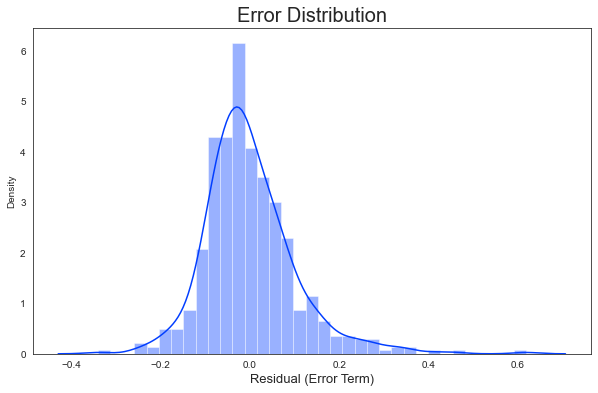

In [55]:
# Checking if  the error terms are normally distributed
plt.figure(figsize = (10,6))
train_y_pred = lr_model.predict(train_x_sm)
residual = train_y_pred - train_y
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 13})
plt.title('Error Distribution', fontdict={'fontsize': 20})
plt.show()

The error terms are normally distributed, which validates our first assumption.

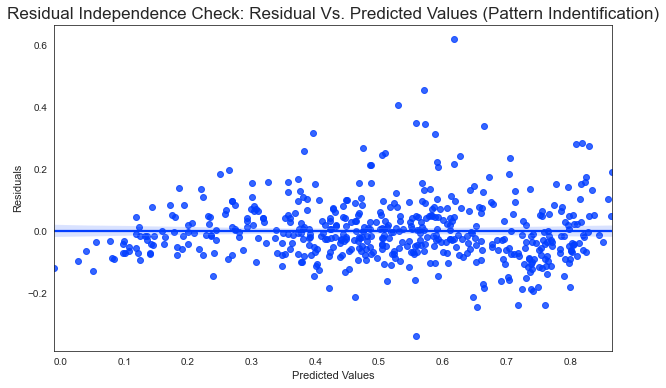

In [56]:
# Checking if the error terms are independent
plt.figure(figsize = (10,6))
sns.regplot(x=train_y_pred, y=residual)
plt.title('Residual Independence Check: Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 17})
plt.xlabel('Predicted Values', fontdict={'fontsize': 11})
plt.ylabel('Residuals', fontdict={'fontsize': 11})
plt.show()

In [57]:
print("Pearson Value for Predicted Value Against Residual ==>", pearsonr(train_y_pred, residual)[0])

Pearson Value for Predicted Value Against Residual ==> 3.2768926461201886e-15


As assumed, there is no relationship between the residuals and the predicted values. 

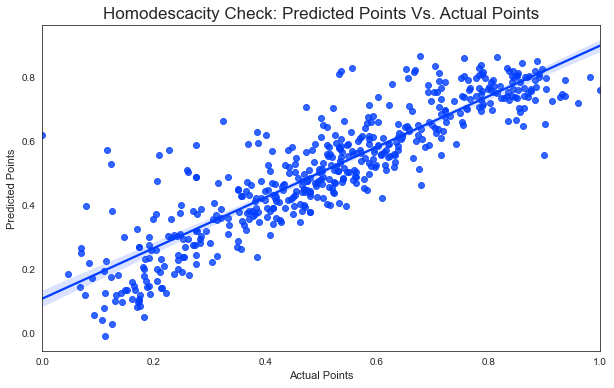

In [58]:
# Checking the homodescacity
plt.figure(figsize = (10,6))
sns.regplot(x=train_y, y=train_y_pred)
plt.title('Homodescacity Check: Predicted Points Vs. Actual Points', fontdict={'fontsize': 17})
plt.xlabel('Actual Points', fontdict={'fontsize': 11})
plt.ylabel('Predicted Points', fontdict={'fontsize': 11})
plt.show()

Here we can say there is equal variance and there is no dense concentration of data points in different regions which validates our third assumption.

For fourth assumption we already have got VIFs of all the independent features and these is nomulticollinearty as such. 

### 9. Making Predicions on the test data

In [59]:
# Splitting the data into X_test and y_test
test_y = test.pop('cnt')
test_x = test

In [60]:
test_x.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_Fine',
       'weathersit_Good'],
      dtype='object')

In [61]:
# filtering out the columns required for predictions
test_x = test_x[['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Fine']]

In [62]:
# predicting the target variable for test data with our final model
test_x_sm = sm.add_constant(test_x)

test_y_pred = lr_model.predict(test_x_sm) 

In [64]:
#
from sklearn.metrics import r2_score
r2_score(test_y, test_y_pred)

0.7778798147259003

### 10. Final Summary and Insights:

- I have acheived an R2 Score of 0.78 which indicates that 78% of the variance is captured by our predictive model.
- The model satisfies all the assumptions of multivariate linear regression.
- temp, windspeed, season_summer are the three main factors that should be given utmost importance while decision making.
- From the analysis it is noticable that bookings rise on good weather days and summer season.
- Based on these claims the bike company should increase their availability and promotions for greater revenue.
- Future Enhancements: The model can be made more efficient using regularized techniques like Ridge and Lasso regression.